## 🔰*====================== Regression Project: ============================*🔰
* Medical Cost Dataset

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataset = "https://raw.githubusercontent.com/delta2echo/tensorflow_portfolio/main/datasets/insurance.csv"

In [3]:
df = pd.read_csv(dataset)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 🔰*====================== Review & Prep Data: ============================*🔰

In [4]:
#--------- Review Data Datatypes:
df.info()

#Note: Object Datatype are strings and can be One-Hot-Encoded 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#----- One Hot Encode non-numerical data
df = pd.get_dummies(df)                              #Pandas offers OHE functionality
df = df.drop(['sex_female','smoker_no'],axis = 1)    #--- Drop Binary variable columns: 

#---- Split into x & y sets:
x = df.drop(['charges'],axis = 1)
y = df['charges']

#--- Review:
print("x data:\n",x.iloc[0:3,:],'\n\n')
print("y data:\n",y.iloc[0:3])

x data:
    age    bmi  children  sex_male  smoker_yes  region_northeast  \
0   19  27.90         0         0           1                 0   
1   18  33.77         1         1           0                 0   
2   28  33.00         3         1           0                 0   

   region_northwest  region_southeast  region_southwest  
0                 0                 0                 1  
1                 0                 1                 0  
2                 0                 1                 0   


y data:
 0    16884.9240
1     1725.5523
2     4449.4620
Name: charges, dtype: float64


In [6]:
#----------------- Review Data Statistics:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.00000,39.0,51.00000,64.00
bmi,1338.0,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
children,1338.0,1.094918,1.205493,0.00,0.00000,1.0,2.00000,5.00
sex_male,1338.0,0.505232,0.500160,0.00,0.00000,1.0,1.00000,1.00
smoker_yes,1338.0,0.204783,0.403694,0.00,0.00000,0.0,0.00000,1.00
region_northeast,1338.0,0.242152,0.428546,0.00,0.00000,0.0,0.00000,1.00
region_northwest,1338.0,0.242900,0.428995,0.00,0.00000,0.0,0.00000,1.00
region_southeast,1338.0,0.272048,0.445181,0.00,0.00000,0.0,1.00000,1.00
region_southwest,1338.0,0.242900,0.428995,0.00,0.00000,0.0,0.00000,1.00


In [7]:
#--- Split into Train/Test set:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.80, random_state = 123)

In [8]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1070, 9), (1070,), (268, 9), (268,))

In [9]:
#--- Scale Data:                                #Input for NNs should be scaled close to the interval [0,1]
mms = MinMaxScaler()
mms.fit(x_train)                                #Note: Fitting the Scaler should only occur on *Training Data* to avoid information leakage
x_train_s = mms.transform(x_train)              #Scale x train data
x_test_s = mms.transform(x_test)                #Scale x test data

In [10]:
print(x_train_s[0:1,:])
print(x_test_s[0:1,:])

[[0.47826087 0.27858488 0.2        1.         0.         0.
  1.         0.         0.        ]]
[[0.67391304 0.7188593  0.4        0.         0.         0.
  0.         1.         0.        ]]


In [11]:
## 🔰*====================== Visiualize Data ============================*🔰
import seaborn as sns

In [12]:
#------------- Convert to Dataframe to work with seaborn
df_train = pd.DataFrame(x_train.copy(),columns=x_train.columns)
df_train['charges'] = y_train.copy()
df_train.head(2)

,age,bmi,children,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
67,40,26.315,1,1,0,0,1,0,0,6389.37785
736,37,38.390,0,0,1,0,0,1,0,40419.01910


In [13]:
df_train.shape,x_train.shape

((1070, 10), (1070, 9))

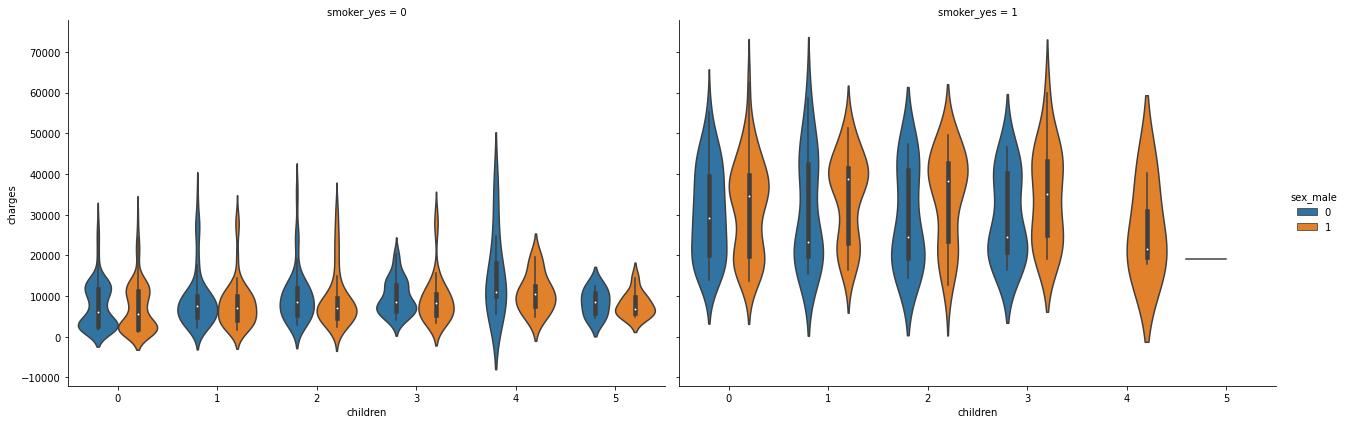

In [14]:
sns.catplot(x='children',y='charges',hue='sex_male',col='smoker_yes',
            data=df_train,dodge=True,kind='violin',height=6,aspect=1.5)

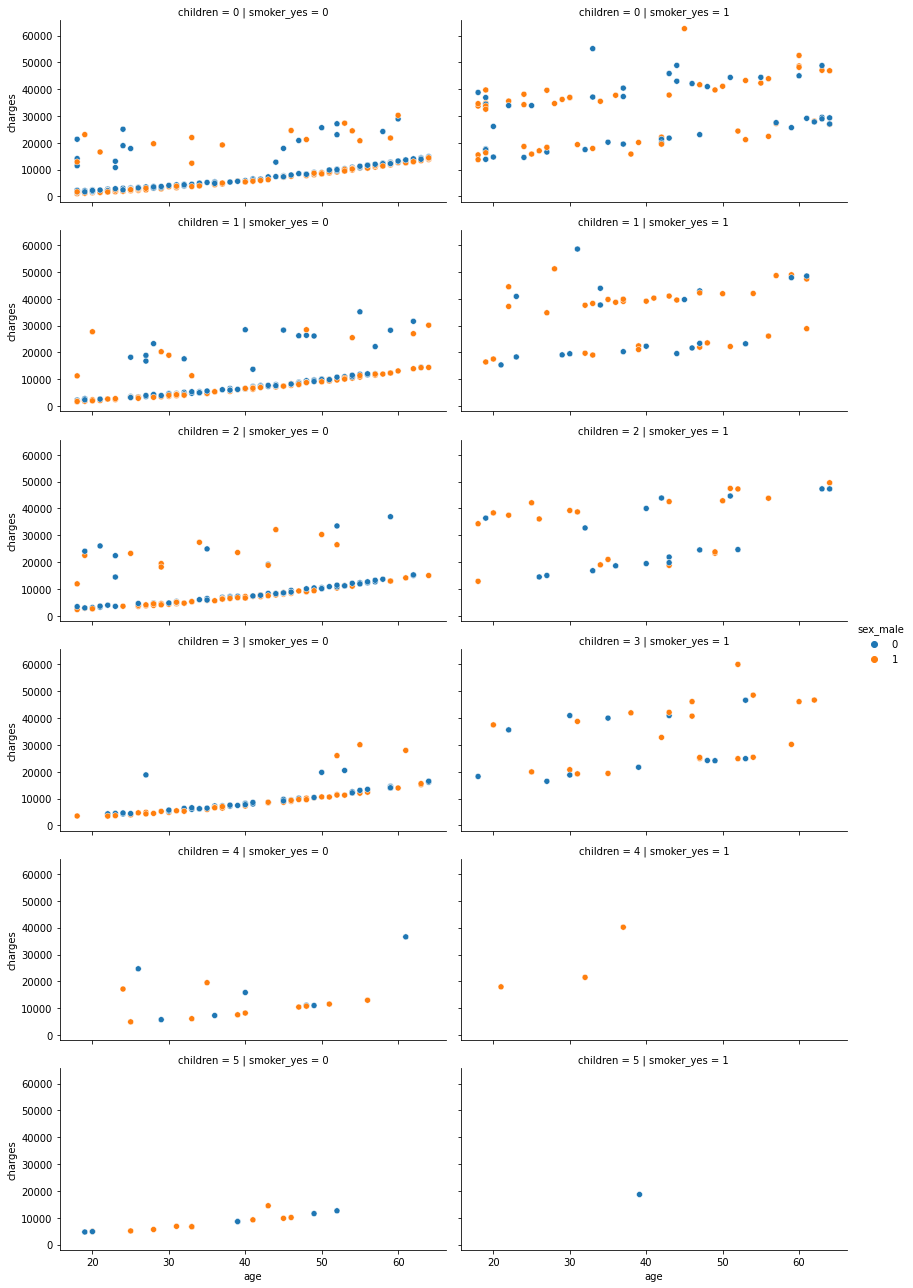

In [15]:
sns.relplot(x='age',y='charges',hue='sex_male',col='smoker_yes',row='children',
            data=df_train, height=3,aspect=2)

## 🔰*========= Build A Standard Regression Model For Baseline Comparision ================*🔰
* [Regression](https://academic.oup.com/ejcts/article/55/2/179/5265263)

In [16]:
#---- Create a Baseline Model:
from sklearn.linear_model import LinearRegression

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_s,y_train)
lr_train_pred = lin_reg.predict(x_train_s)

baseline_train_mae = tf.keras.losses.mae(y_train,lr_train_pred).numpy()
print(f'training baseline mse: {baseline_train_mae}')

training baseline mse: 4271.289422897196


In [18]:
lr_test_pred = lin_reg.predict(x_test_s)

baseline_test_mae = tf.keras.losses.mae(y_test,lr_test_pred).numpy()
print(f'baseline mse: {baseline_test_mae}')

baseline mse: 4012.8872955932834


## 🔰*====================== Build Model ============================*🔰

In [34]:
#---- Helper Function:
def Compare(model_nn,loss_func,x_data,y_data,bl_error):
  y_pred = model_nn.predict(x_data).squeeze()
  model_mae = loss_func(y_data,y_pred).numpy()
  print(f'          Model MAE: {model_mae:9.3f}')
  print(f'       BaseLine MAE: {bl_error:9.3f}')
  print(f'Baseline Comparison: {(model_mae-bl_error)/bl_error:9.3f}')

def PrepModel(layers,loss_func,optimizer,metric):
  #----- Set random Seed:
  seed = sum([ord(c) for c in "Build a Regression Model"])
  print('seed: ',seed)
  tf.random.set_seed(seed)  

  #---- Create a simple Model:
  model = tf.keras.Sequential(layers)

  #--- Compile Model:
  model.compile(loss=loss_func,
                optimizer=optimizer,
                metrics=metric) 
  
  #--- Show Model:
  model.summary()
  plot = plot_model(model,show_shapes=True)

  return model,plot

seed:  2243
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Outlayer (Dense)            (None, 1)                 10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


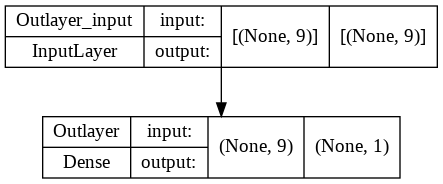

In [52]:
inputShape = (x_train_s.shape[1],)
layers = [tf.keras.layers.Dense(units= 1,
                                input_shape = inputShape,
                                name='Outlayer')]

cost_model,plot = PrepModel(layers=layers,
                            loss_func=tf.keras.losses.mae,
                            optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                            metric=['mae'])
plot

In [53]:
#--- Fit Model:
history = cost_model.fit(x_train_s,y_train,epochs=500,verbose=0)

In [54]:
#--- Compare Results:                           *Worse* than baseline by almost a factor of 2x
Compare(model_nn=cost_model,
        loss_func=tf.keras.losses.mae,
        x_data=x_train_s,
        y_data=y_train,
        bl_error=baseline_train_mae)

          Model MAE: 12558.313
       BaseLine MAE:  4271.289
Baseline Comparison:     1.940


Text(0.5, 0, 'epochs')

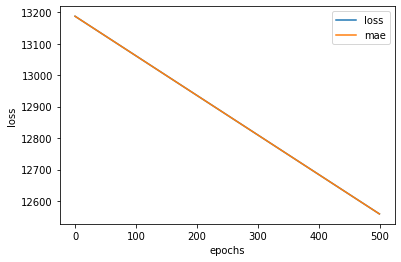

In [55]:
#------------------View Loss/Training Curve:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

seed:  2243
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_01 (Dense)           (None, 5)                 50        
                                                                 
 Outlayer (Dense)            (None, 1)                 6         
                                                                 
Total params: 56
Trainable params: 56
Non-trainable params: 0
_________________________________________________________________


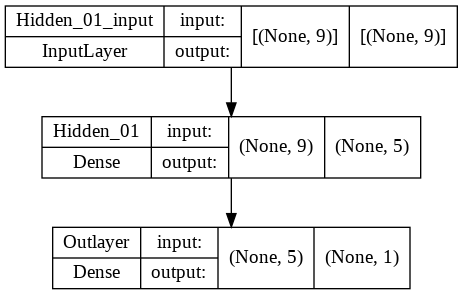

In [60]:
#-----------------------------------------------Improve Model: Increase Depth
inputShape = (x_train_s.shape[1],)
layers = [tf.keras.layers.Dense(units= 5,
                                input_shape = inputShape,
                                name='Hidden_01'),
          tf.keras.layers.Dense(units= 1,
                                input_shape = (5,),
                                name='Outlayer'),]

cost_model,plot = PrepModel(layers=layers,
                            loss_func=tf.keras.losses.mae,
                            optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                            metric=['mae'])
plot

In [61]:
#--- Fit Model:
history = cost_model.fit(x_train_s,y_train,epochs=500,verbose=0)

In [62]:
#--- Compare Results:                     Large improvement over previous MAE loss:  12495.332
Compare(model_nn=cost_model,
        loss_func=tf.keras.losses.mae,
        x_data=x_train_s,
        y_data=y_train,
        bl_error=baseline_train_mae)

          Model MAE:  3580.671
       BaseLine MAE:  4271.289
Baseline Comparison:    -0.162


Text(0.5, 0, 'epochs')

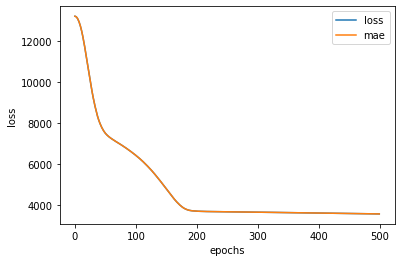

In [63]:
#------------------View Loss/Training Curve:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

seed:  2243
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_01 (Dense)           (None, 10)                100       
                                                                 
 Hidden_02 (Dense)           (None, 5)                 55        
                                                                 
 Outlayer (Dense)            (None, 1)                 6         
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


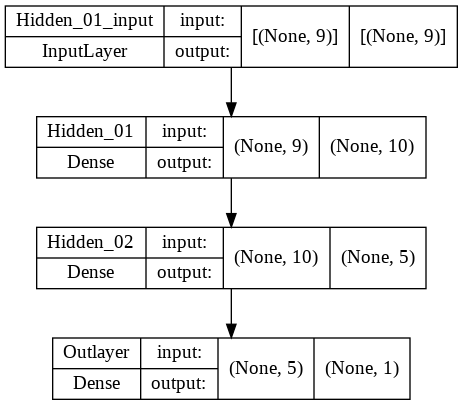

In [64]:
#------------------ Improve Model: Increase Depth Again
inputShape = (x_train_s.shape[1],)
layers = [tf.keras.layers.Dense(units= 10,
                                input_shape = inputShape,
                                name='Hidden_01'),
          tf.keras.layers.Dense(units= 5,
                                input_shape = inputShape,
                                name='Hidden_02'),          
          tf.keras.layers.Dense(units= 1,
                                input_shape = (5,),
                                name='Outlayer'),]

cost_model,plot = PrepModel(layers=layers,
                            loss_func=tf.keras.losses.mae,
                            optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                            metric=['mae'])
plot

In [65]:
#--- Fit Model:
history = cost_model.fit(x_train_s,y_train,epochs=500,verbose=0)

In [66]:
#--- Compare Results:                     Small improvement over previous MAE loss: 3580.671
Compare(model_nn=cost_model,
        loss_func=tf.keras.losses.mae,
        x_data=x_train_s,
        y_data=y_train,
        bl_error=baseline_train_mae)

          Model MAE:  3515.604
       BaseLine MAE:  4271.289
Baseline Comparison:    -0.177


Text(0.5, 0, 'epochs')

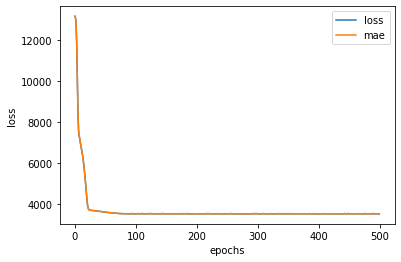

In [67]:
#------------------View Loss/Training Curve:            It appears that this model converges quickly, and sees little improvement after 100 epochs
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

## 🔑 How Long Should a Model be Trained For?
  * Depends on Data and Model Complexity
  * Until the Loss curve Flattens
    * Start with 100-500 epochs as a baseline
    * Use the loss curve generated to inform next iteration
    * tensorflow **Early Stopping** can be used (will be used in other projects)

In [68]:
#-------------------- Compare model to baseline on Test Data:
lr_test_pred = lin_reg.predict(x_test_s)
baseline_test_mae = tf.keras.losses.mae(y_test,lr_test_pred).numpy()

#--- Compare Test Results:                     Large Improvement 25% over Baseline! 
Compare(model_nn=cost_model,
        loss_func=tf.keras.losses.mae,
        x_data=x_test_s,
        y_data=y_test,
        bl_error=baseline_test_mae)

          Model MAE:  3005.099
       BaseLine MAE:  4012.887
Baseline Comparison:    -0.251
